# Exploring Fast F1 Library

*This Jupyter Notebook serves as my scratch paper for Fast F1. A big part of starting this project was being able to explore analytics and the technical side of Formula 1 and this notebook serves as my exploration.*

## Imports

In [1]:
import fastf1
from matplotlib import pyplot as plt
import pandas as pd
import fastf1
import fastf1.plotting

## Exploration

In [2]:
session = fastf1.get_session(2024, 'Monaco', 'Q')
session.load(telemetry=True, laps=True, weather=True)

req         WARNING 	DEFAULT CACHE ENABLED! (7.88 GB) /Users/christianreyes/Library/Caches/fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '27', '3', '18', '20', '14', '2', '11', '77', '24']


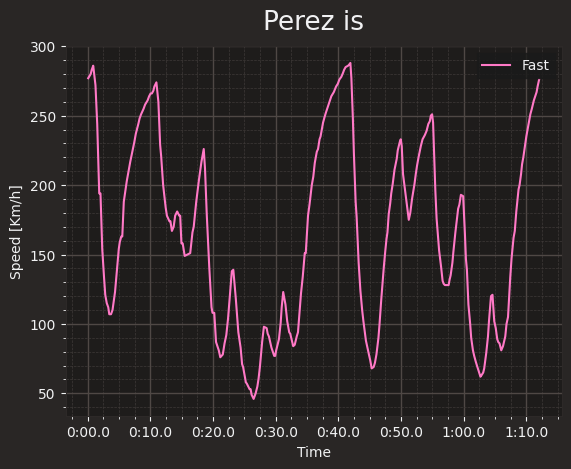

In [3]:
fastf1.plotting.setup_mpl()

session = fastf1.get_session(2024, 'Monaco', 'Q')

session.load()
fast_perez = session.laps.pick_driver('PER').pick_fastest()
per_car_data = fast_perez.get_car_data()
t = per_car_data['Time']
vCar = per_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Perez is')
ax.legend()
plt.show()

# Building a Formula 1 Race Prediction Model.
_This model predicts the winner of a given race based on average qualifying time, grid position, driver ID, and team name._

In [4]:
def get_race_data(year, race_name, session_type="R"):
    try:
        session = fastf1.get_session(year, race_name, session_type)
        session.load()
        race_data = session.results.loc[:, [
            'DriverNumber', 'DriverId', 'Abbreviation', 'FullName',
            'TeamName', 'Position', 'GridPosition', 'Q1', 'Q2', 'Q3'
        ]]
        race_data['Year'] = year
        race_data['RaceName'] = race_name
        return race_data
    except Exception as e:
        print(f"Error loading data for {race_name} in {year}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of an error

In [5]:
def get_qualifying_data(year, race_name, session_type="Q"):
    try:
        session = fastf1.get_session(year, race_name, session_type)
        session.load()
        qualifying_data = session.results.loc[:, [
            'DriverNumber', 'DriverId', 'Abbreviation', 'FullName',
            'TeamName', 'Q1', 'Q2', 'Q3'
        ]]
        qualifying_data['Year'] = year
        qualifying_data['RaceName'] = race_name
        return qualifying_data
    except Exception as e:
        print(f"Error loading data for {race_name} in {year}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of an error

In [6]:
def collect_data(years, race_names):
    combined_data = []
    for year in years:
        for race_name in race_names:
            race_data = get_race_data(year, race_name)
            qualifying_data = get_qualifying_data(year, race_name)
            
            if not race_data.empty and not qualifying_data.empty:
                # Merge race and qualifying data on common columns
                combined = pd.merge(race_data, 
                                    qualifying_data, 
                                    on = ['DriverId', 'Year', 'RaceName', 'DriverNumber', 'Abbreviation', 'FullName', 'TeamName', 'RaceName'], 
                                    how = 'inner')
                combined_data.append(combined)
            print("DONE GETTING RACE", race_name)
        print("Completed collecting race data for: ", year)
    
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data was collected


In [7]:
# Define the years and race names 
years = [2021, 2022, 2023]
race_names = list(range(1, 23))

# Collect data
qualifying_data = collect_data(years, race_names)
print("Step 1 Completed. Collected Data.")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
core           INFO 	Loading data for Bahrain Grand Prix - Quali

DONE GETTING RACE 1


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '4', '16', '55', '3', '10', '18', '31', '14', '11', '22', '7', '99', '5', '47', '9', '77', '63', '6']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_

DONE GETTING RACE 2


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '4', '16', '31', '14', '3', '10', '55', '99', '5', '18', '22', '63', '47', '6', '9', '7']
core           INFO 	Loading data for Portuguese Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 3


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7', '5', '63', '99', '6', '14', '47', '9', '22']
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 4


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '55', '4', '11', '5', '10', '44', '18', '31', '99', '7', '3', '14', '63', '6', '22', '9', '47', '77', '16']
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_d

DONE GETTING RACE 5


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '5', '10', '16', '4', '14', '22', '55', '3', '7', '99', '77', '47', '9', '44', '6', '63', '33', '18', '31']
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 6


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '4', '3', '10', '14', '5', '18', '55', '63', '22', '31', '99', '16', '7', '6', '47', '9']
core           INFO 	Loading data for French Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_d

DONE GETTING RACE 7


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '11', '4', '55', '16', '18', '14', '22', '7', '5', '3', '31', '99', '47', '6', '9', '63', '10']
core           INFO 	Loading data for Styrian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 8


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

DONE GETTING RACE 9


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '16', '77', '4', '3', '55', '14', '18', '31', '22', '10', '63', '99', '6', '7', '11', '9', '47', '5', '33']
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 10


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['31', '44', '55', '14', '10', '22', '6', '63', '33', '7', '3', '47', '99', '9', '4', '77', '11', '16', '18', '5']
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_statu

DONE GETTING RACE 11


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '63', '44', '3', '5', '10', '31', '16', '6', '55', '14', '77', '99', '4', '22', '47', '9', '7', '11', '18']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 12


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_d

DONE GETTING RACE 13


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

DONE GETTING RACE 14


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '55', '3', '77', '14', '4', '7', '11', '63', '18', '5', '10', '31', '16', '99', '22', '9', '6', '47']
core           INFO 	Loading data for Russian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 15


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '33', '11', '16', '44', '10', '4', '55', '18', '31', '99', '7', '3', '22', '63', '14', '6', '5', '47', '9']
core           INFO 	Loading data for Turkish Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

DONE GETTING RACE 16


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  7: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9', '14', '31', '10']
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using c

DONE GETTING RACE 17


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '10', '16', '55', '5', '7', '14', '4', '99', '3', '31', '18', '77', '63', '6', '9', '47', '22']
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 18


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', '7', '63', '99', '22', '6', '9', '47', '3', '18']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_statu

DONE GETTING RACE 19


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '14', '11', '31', '18', '55', '16', '4', '5', '10', '3', '22', '7', '99', '47', '63', '9', '6', '77']
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_da

DONE GETTING RACE 20


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '31', '3', '10', '16', '55', '99', '4', '18', '6', '14', '22', '7', '5', '11', '9', '63', '47']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

DONE GETTING RACE 21


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7', '9']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.3.8]
req            INFO 

DONE GETTING RACE 22
Completed collecting race data for:  2021


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error loading data for 1 in 2022: 'DriverNumber'


req            INFO 	Using cached data for session_status_data
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNING 	Failed to load track status data!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
logger      WARNING 	Failed to load timing data!
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
logger      WARNING 	Failed to load weather data!
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']
core           INFO 	Loading data for Saudi Arabi

DONE GETTING RACE 1


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 2 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 2 in 2022: 'DriverNumber'
DONE GETTING RACE 2


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 3 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 3 in 2022: 'DriverNumber'
DONE GETTING RACE 3


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 4 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 4 in 2022: 'DriverNumber'
DONE GETTING RACE 4


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 5 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 5 in 2022: 'DriverNumber'
DONE GETTING RACE 5


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 6 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 6 in 2022: 'DriverNumber'
DONE GETTING RACE 6


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 7 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 7 in 2022: 'DriverNumber'
DONE GETTING RACE 7


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 8 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 8 in 2022: 'DriverNumber'
DONE GETTING RACE 8


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 9 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 9 in 2022: 'DriverNumber'
DONE GETTING RACE 9


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 10 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 10 in 2022: 'DriverNumber'
DONE GETTING RACE 10


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 11 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for French Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 11 in 2022: 'DriverNumber'
DONE GETTING RACE 11


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for French Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 12 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 12 in 2022: 'DriverNumber'
DONE GETTING RACE 12


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 13 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 13 in 2022: 'DriverNumber'
DONE GETTING RACE 13


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 14 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 14 in 2022: 'DriverNumber'
DONE GETTING RACE 14


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 15 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 15 in 2022: 'DriverNumber'
DONE GETTING RACE 15


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 16 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 16 in 2022: 'DriverNumber'
DONE GETTING RACE 16


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 17 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 17 in 2022: 'DriverNumber'
DONE GETTING RACE 17


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 18 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for United States Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 18 in 2022: 'DriverNumber'
DONE GETTING RACE 18


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 19 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 19 in 2022: 'DriverNumber'
DONE GETTING RACE 19


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 20 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 20 in 2022: 'DriverNumber'
DONE GETTING RACE 20


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 21 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 21 in 2022: 'DriverNumber'
DONE GETTING RACE 21


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading data for 22 in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error loading data for 22 in 2022: 'DriverNumber'
DONE GETTING RACE 22
Completed collecting race data for:  2022


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 1


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for sessio

DONE GETTING RACE 2


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

DONE GETTING RACE 3


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

DONE GETTING RACE 4


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

DONE GETTING RACE 5


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_statu

DONE GETTING RACE 6


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '22', '81', '21', '27', '23', '4', '20', '77', '2']
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 7


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '44', '16', '55', '11', '23', '31', '18', '77', '81', '10', '4', '22', '27', '24', '20', '21', '63', '2']
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 8


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 9


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 10


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 11


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '44', '14', '63', '4', '31', '18', '22', '10', '77', '24', '23', '20', '3', '2', '27', '55', '81']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_statu

DONE GETTING RACE 12


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

DONE GETTING RACE 13


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

DONE GETTING RACE 14


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '14', '63', '77', '31', '22', '18']
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.8]
req            

DONE GETTING RACE 15


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '22', '24', '27', '20', '23', '2', '18', '11', '77']
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 16


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 55
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 55)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '63', '16', '14', '31', '77', '24', '11', '18', '10', '23', '20', '22', '27', '40', '2', '44', '55']
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.3.8]
req            INFO

DONE GETTING RACE 17


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session

DONE GETTING RACE 18


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_s

DONE GETTING RACE 19


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', '20', '23', '16']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 20


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '31', '18', '55', '44', '63', '14', '81', '10', '23', '20', '3', '24', '2', '77', '22', '27', '4']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 21


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '11', '4', '81', '14', '22', '44', '18', '3', '31', '10', '23', '27', '2', '24', '55', '77', '20']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_sta

DONE GETTING RACE 22
Completed collecting race data for:  2023
Step 1 Completed. Collected Data.


In [15]:
# Save the data to a CSV file for inspection
qualifying_data.to_csv('racing-data.csv', index=False)

In [16]:
df = pd.read_csv('racing-data.csv')

In [17]:
df.head()

,DriverNumber,DriverId,Abbreviation,FullName,TeamName,Position,GridPosition,Q1_x,Q2_x,Q3_x,Year,RaceName,Q1_y,Q2_y,Q3_y
0,44,hamilton,HAM,Lewis Hamilton,Mercedes,1.0,2.0,NaN,NaN,NaN,2021,1,0 days 00:01:30.617000,0 days 00:01:30.085000,0 days 00:01:29.385000
1,33,max_verstappen,VER,Max Verstappen,Red Bull Racing,2.0,1.0,NaN,NaN,NaN,2021,1,0 days 00:01:30.499000,0 days 00:01:30.318000,0 days 00:01:28.997000
2,77,bottas,BOT,Valtteri Bottas,Mercedes,3.0,3.0,NaN,NaN,NaN,2021,1,0 days 00:01:31.200000,0 days 00:01:30.186000,0 days 00:01:29.586000
3,4,norris,NOR,Lando Norris,McLaren,4.0,7.0,NaN,NaN,NaN,2021,1,0 days 00:01:30.902000,0 days 00:01:30.099000,0 days 00:01:29.974000
4,11,perez,PER,Sergio Perez,Red Bull Racing,5.0,0.0,NaN,NaN,NaN,2021,1,0 days 00:01:31.165000,0 days 00:01:30.659000,NaN


In [18]:
# Updated prepare_features function
def prepare_features(data):
    # Convert qualifying times (Q1_y, Q2_y, Q3_y) to seconds and fill NaNs with high values (indicating no time set)
    for session in ['Q1_y', 'Q2_y', 'Q3_y']:
        data[session] = pd.to_timedelta(data[session], errors='coerce').dt.total_seconds()
        data[session] = data[session].fillna(9999)
    
    # Encode categorical features
    data['DriverId'] = data['DriverId'].astype('category').cat.codes
    data['TeamName'] = data['TeamName'].astype('category').cat.codes
    
    # Feature for average qualifying time
    data['AvgQualifyingTime'] = data[['Q1_y', 'Q2_y', 'Q3_y']].mean(axis=1)
    
    return data

# Prepare features
prepared_data = prepare_features(df)
print(prepared_data.head())


   DriverNumber  DriverId Abbreviation         FullName  TeamName  Position  \
0            44         6          HAM   Lewis Hamilton         8       1.0   
1            33        13          VER   Max Verstappen         9       2.0   
2            77         2          BOT  Valtteri Bottas         8       3.0   
3             4        16          NOR     Lando Norris         7       4.0   
4            11        18          PER     Sergio Perez         9       5.0   

   GridPosition  Q1_x  Q2_x  Q3_x  Year  RaceName    Q1_y    Q2_y      Q3_y  \
0           2.0   NaN   NaN   NaN  2021         1  90.617  90.085    89.385   
1           1.0   NaN   NaN   NaN  2021         1  90.499  90.318    88.997   
2           3.0   NaN   NaN   NaN  2021         1  91.200  90.186    89.586   
3           7.0   NaN   NaN   NaN  2021         1  90.902  90.099    89.974   
4           0.0   NaN   NaN   NaN  2021         1  91.165  90.659  9999.000   

   AvgQualifyingTime  
0             90.029  
1   

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming prepared_data is your DataFrame after running prepare_features
prepared_data['IsWinner'] = (prepared_data['Position'] == 1).astype(int)

# Filter out extreme values in AvgQualifyingTime
valid_data = prepared_data[prepared_data['AvgQualifyingTime'] < 9999]

# Handle NaNs in GridPosition (e.g., filling NaNs with median grid position)
valid_data['GridPosition'].fillna(valid_data['GridPosition'].median(), inplace=True)

# Define features and target
features = ['GridPosition', 'AvgQualifyingTime', 'Position']
X = valid_data[features]

# Fill NaNs in the 'Position' column with the mean of the column
X['Position'].fillna(X['Position'].mean(), inplace=True)

# Alternatively, you can use the median if it's more appropriate for your data:
# X['Position'].fillna(X['Position'].median(), inplace=True)

y = valid_data['IsWinner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a Neural Network classifier
model = MLPClassifier(hidden_layer_sizes=(200, 200, 100), max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/1465039387.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_data['GridPosition'].fillna(valid_data['GridPosition'].median(), inplace=True)
/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/1465039387.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00        16

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [78]:
# Step 1: Collect and Prepare Data for the Target Race

# Example: Collect data for Monaco Grand Prix in 2024
target_race_data = collect_data([2024], ["Miami Grand Prix"])

# Check if data collection was successful
if target_race_data.empty:
    print("No data available for Monaco Grand Prix 2024.")
else:
    # Step 2: Prepare the Features
    prepared_target_data = prepare_features(target_race_data)

    # Ensure the target features match those used during training
    X_target_race = prepared_target_data[features]

    # Step 3: Make Predictions
    win_probabilities = model.predict_proba(X_target_race)[:, 1]  # Probability of being the winner
    prepared_target_data['WinProbability'] = win_probabilities

    # Step 4: Interpret the Predictions
    # Sort by 'WinProbability' in descending order and get the top 5
    top_5_drivers = prepared_target_data.nlargest(5, 'WinProbability')

    print("Top 5 most likely winners for Monaco Grand Prix 2024:")
    print(top_5_drivers[['FullName', 'TeamName', 'GridPosition', 'AvgQualifyingTime', 'WinProbability']])


TypeError: collect_data() takes 1 positional argument but 2 were given

# Building a Prediction Model for NEW Races

In [38]:
import pandas as pd
import fastf1

def get_race_data(year, race_name, session_type="R"):
    """
    Collect race data for a specified year and race name.

    Parameters:
    - year (int): The year of the race.
    - race_name (str): The name of the race.
    - session_type (str): Type of session ("R" for Race, default is "R").

    Returns:
    - pd.DataFrame: DataFrame containing the race data.
    """
    try:
        session = fastf1.get_session(year, race_name, session_type)
        session.load()
        race_data = session.results.loc[:, [
            'DriverNumber', 'DriverId', 'Abbreviation', 'FullName',
            'TeamName', 'Position', 'GridPosition'
        ]]
        race_data['Year'] = year
        race_data['RaceName'] = race_name
        return race_data
    except Exception as e:
        print(f"Error loading race data for {race_name} in {year}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of an error

def get_qualifying_data(year, race_name, session_type="Q"):
    """
    Collect qualifying data for a specified year and race name.

    Parameters:
    - year (int): The year of the race.
    - race_name (str): The name of the race.
    - session_type (str): Type of session ("Q" for Qualifying, default is "Q").

    Returns:
    - pd.DataFrame: DataFrame containing the qualifying data.
    """
    try:
        session = fastf1.get_session(year, race_name, session_type)
        session.load()
        qualifying_data = session.results.loc[:, [
            'DriverNumber', 'DriverId', 'Abbreviation', 'FullName',
            'TeamName', 'Q1', 'Q2', 'Q3'
        ]]
        qualifying_data['Year'] = year
        qualifying_data['RaceName'] = race_name
        return qualifying_data
    except Exception as e:
        print(f"Error loading qualifying data for {race_name} in {year}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of an error

def get_race_names_for_year(year):
    """
    Get the list of race names for a given year.

    Parameters:
    - year (int): The year to get race names for.

    Returns:
    - list of str: List of race names for the specified year.
    """
    try:
        schedule = fastf1.get_event_schedule(year)
        race_names = schedule['EventName'].tolist()
        return race_names
    except Exception as e:
        print(f"Error fetching race schedule for {year}: {e}")
        return []  # Return an empty list in case of an error

def collect_data(years):
    """
    Collect and combine race and qualifying data for the specified years.

    Parameters:
    - years (list of int): List of years to collect data for.

    Returns:
    - pd.DataFrame: Combined DataFrame of race and qualifying data.
    """
    combined_data = []
    
    for year in years:
        race_names = get_race_names_for_year(year)
        if not race_names:
            continue  # Skip to the next year if no race names are found
        
        for race_name in race_names:
            race_data = get_race_data(year, race_name)
            qualifying_data = get_qualifying_data(year, race_name)
            
            if not race_data.empty and not qualifying_data.empty:
                # Merge race and qualifying data on common columns
                combined = pd.merge(race_data, qualifying_data, 
                                    on=['DriverNumber', 'DriverId', 'Abbreviation', 'FullName', 'TeamName', 'Year', 'RaceName'], 
                                    suffixes=('_race', '_qualifying'))
                combined_data.append(combined)
            else:
                print(f"No data for {race_name} in {year}")
        print(f"Completed collecting data for year: {year}")
    
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data was collected

# Example usage:
years = [2021, 2022, 2023]  # Specify the years you want to collect data for
historical_data = collect_data(years)

print(historical_data.head())

core           INFO 	Loading data for Portuguese Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2021/3/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 285, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 253, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/fastf1/req.py", line 125, in send
    lim.limit()
  File "/Users/christianreyes/dev/fastf1/.venv

Completed collecting data for year: 2021


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Pre-Season Track Session in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Pre-Season Track Session in 2022: 'DriverNumber'
No data for Pre-Season Track Session in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Pre-Season Test in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Pre-Season Test in 2022: 'DriverNumber'
No data for Pre-Season Test in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2022/1/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 285, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 253, in _send_and_cache
    response = super

Error loading race data for Bahrain Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load track status data!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
logger      WARNING 	Failed to load timing data!
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
logger      WARNING 	Failed to load weather data!
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


No data for Bahrain Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Saudi Arabian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Saudi Arabian Grand Prix in 2022: 'DriverNumber'
No data for Saudi Arabian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Australian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Australian Grand Prix in 2022: 'DriverNumber'
No data for Australian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Emilia Romagna Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Emilia Romagna Grand Prix in 2022: 'DriverNumber'
No data for Emilia Romagna Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Miami Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Miami Grand Prix in 2022: 'DriverNumber'
No data for Miami Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Spanish Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Spanish Grand Prix in 2022: 'DriverNumber'
No data for Spanish Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Monaco Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Monaco Grand Prix in 2022: 'DriverNumber'
No data for Monaco Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Azerbaijan Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Azerbaijan Grand Prix in 2022: 'DriverNumber'
No data for Azerbaijan Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Canadian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Canadian Grand Prix in 2022: 'DriverNumber'
No data for Canadian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for British Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for British Grand Prix in 2022: 'DriverNumber'
No data for British Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Austrian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for French Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Austrian Grand Prix in 2022: 'DriverNumber'
No data for Austrian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for French Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for French Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for French Grand Prix in 2022: 'DriverNumber'
No data for French Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Hungarian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Hungarian Grand Prix in 2022: 'DriverNumber'
No data for Hungarian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Belgian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Belgian Grand Prix in 2022: 'DriverNumber'
No data for Belgian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Dutch Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Dutch Grand Prix in 2022: 'DriverNumber'
No data for Dutch Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Italian Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Italian Grand Prix in 2022: 'DriverNumber'
No data for Italian Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Singapore Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Singapore Grand Prix in 2022: 'DriverNumber'
No data for Singapore Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Japanese Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for United States Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Japanese Grand Prix in 2022: 'DriverNumber'
No data for Japanese Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for United States Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for United States Grand Prix in 2022: 'DriverNumber'
No data for United States Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Mexico City Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for Mexico City Grand Prix in 2022: 'DriverNumber'
No data for Mexico City Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for São Paulo Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading qualifying data for São Paulo Grand Prix in 2022: 'DriverNumber'
No data for São Paulo Grand Prix in 2022


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Error loading race data for Abu Dhabi Grand Prix in 2022: 'DriverNumber'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core           INFO 	Loading data for British Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/10/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 285, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 253, in _send_and_cache
    response = super().send(

Error loading qualifying data for Abu Dhabi Grand Prix in 2022: 'DriverNumber'
No data for Abu Dhabi Grand Prix in 2022
Completed collecting data for year: 2022


Request for URL https://ergast.com/api/f1/2023/10/laps/1.json failed; using cached response
Traceback (most recent call last):
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 285, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/requests_cache/session.py", line 253, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/fastf1/req.py", line 125, in send
    lim.limit()
  File "/Users/christianreyes/dev/fastf1/.venv/lib/python3.11/site-packages/fastf1/req.py", line 102, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
req            INF

Completed collecting data for year: 2023
  DriverNumber        DriverId Abbreviation         FullName         TeamName  \
0           44        hamilton          HAM   Lewis Hamilton         Mercedes   
1           33  max_verstappen          VER   Max Verstappen  Red Bull Racing   
2           77          bottas          BOT  Valtteri Bottas         Mercedes   
3           11           perez          PER     Sergio Perez  Red Bull Racing   
4            4          norris          NOR     Lando Norris          McLaren   

   Position  GridPosition  Year         RaceName                     Q1  \
0       1.0           2.0  2021  Pre-Season Test 0 days 00:01:18.857000   
1       2.0           3.0  2021  Pre-Season Test 0 days 00:01:19.485000   
2       3.0           1.0  2021  Pre-Season Test 0 days 00:01:18.722000   
3       4.0           4.0  2021  Pre-Season Test 0 days 00:01:19.337000   
4       5.0           7.0  2021  Pre-Season Test 0 days 00:01:18.794000   

                     

In [59]:
# Save the data to a CSV file for inspection
historical_data.to_csv('historical-data.csv', index=False)

In [62]:
history = pd.read_csv("historical-data.csv")

In [65]:
history.head()

,DriverNumber,DriverId,Abbreviation,FullName,TeamName,Position,GridPosition,Year,RaceName,Q1,Q2,Q3
0,44,hamilton,HAM,Lewis Hamilton,Mercedes,1.0,2.0,2021,Pre-Season Test,0 days 00:01:18.857000,0 days 00:01:17.968000,0 days 00:01:18.355000
1,33,max_verstappen,VER,Max Verstappen,Red Bull Racing,2.0,3.0,2021,Pre-Season Test,0 days 00:01:19.485000,0 days 00:01:18.650000,0 days 00:01:18.746000
2,77,bottas,BOT,Valtteri Bottas,Mercedes,3.0,1.0,2021,Pre-Season Test,0 days 00:01:18.722000,0 days 00:01:18.458000,0 days 00:01:18.348000
3,11,perez,PER,Sergio Perez,Red Bull Racing,4.0,4.0,2021,Pre-Season Test,0 days 00:01:19.337000,0 days 00:01:18.845000,0 days 00:01:18.890000
4,4,norris,NOR,Lando Norris,McLaren,5.0,7.0,2021,Pre-Season Test,0 days 00:01:18.794000,0 days 00:01:18.481000,0 days 00:01:19.116000


In [66]:
# Updated prepare_features function
def prepare_features(data):
    # Convert qualifying times (Q1_y, Q2_y, Q3_y) to seconds and fill NaNs with high values (indicating no time set)
    for session in ['Q1', 'Q2', 'Q3']:
        data[session] = pd.to_timedelta(data[session], errors='coerce').dt.total_seconds()
        data[session] = data[session].fillna(9999)
    
    # Encode categorical features
    data['DriverId'] = data['DriverId'].astype('category').cat.codes
    data['TeamName'] = data['TeamName'].astype('category').cat.codes
    
    # Feature for average qualifying time
    data['AvgQualifyingTime'] = data[['Q1', 'Q2', 'Q3']].mean(axis=1)
    
    return data

# Prepare features
prepared_data = prepare_features(history)
print(prepared_data.head())


   DriverNumber  DriverId Abbreviation         FullName  TeamName  Position  \
0            44         6          HAM   Lewis Hamilton         8       1.0   
1            33        13          VER   Max Verstappen         9       2.0   
2            77         2          BOT  Valtteri Bottas         8       3.0   
3            11        18          PER     Sergio Perez         9       4.0   
4             4        16          NOR     Lando Norris         7       5.0   

   GridPosition  Year         RaceName      Q1      Q2      Q3  \
0           2.0  2021  Pre-Season Test  78.857  77.968  78.355   
1           3.0  2021  Pre-Season Test  79.485  78.650  78.746   
2           1.0  2021  Pre-Season Test  78.722  78.458  78.348   
3           4.0  2021  Pre-Season Test  79.337  78.845  78.890   
4           7.0  2021  Pre-Season Test  78.794  78.481  79.116   

   AvgQualifyingTime  
0          78.393333  
1          78.960333  
2          78.509333  
3          79.024000  
4          78

In [67]:
# Prepare features
prepared_historical_data = prepare_features(history)
print(prepared_historical_data.head())


   DriverNumber  DriverId Abbreviation         FullName  TeamName  Position  \
0            44         6          HAM   Lewis Hamilton         8       1.0   
1            33        13          VER   Max Verstappen         9       2.0   
2            77         2          BOT  Valtteri Bottas         8       3.0   
3            11        18          PER     Sergio Perez         9       4.0   
4             4        16          NOR     Lando Norris         7       5.0   

   GridPosition  Year         RaceName            Q1            Q2  \
0           2.0  2021  Pre-Season Test  7.800000e-08  7.700000e-08   
1           3.0  2021  Pre-Season Test  7.900000e-08  7.800000e-08   
2           1.0  2021  Pre-Season Test  7.800000e-08  7.800000e-08   
3           4.0  2021  Pre-Season Test  7.900000e-08  7.800000e-08   
4           7.0  2021  Pre-Season Test  7.800000e-08  7.800000e-08   

             Q3  AvgQualifyingTime  
0  7.800000e-08       7.766667e-08  
1  7.800000e-08       7.833333

In [71]:
import pandas as pd

def collect_historical_data(grand_prix_names, data_source='historical-data.csv'):
    """
    Collects historical race data for the specified Grand Prix names.
    
    Parameters:
    - grand_prix_names (list of str): Names of the Grand Prix to collect data for.
    - data_source (str): Path to the data source (CSV file, database, etc.).
    
    Returns:
    - pd.DataFrame: Processed historical race data for the specified Grand Prix.
    """
    
    try:
        # Load the historical data from a CSV file (you can adapt this to load from other sources like a database)
        historical_data = pd.read_csv(data_source)
        
        # Filter the data to include only the specified Grand Prix names
        filtered_data = historical_data[historical_data['RaceName'].isin(grand_prix_names)]
        
        # Ensure data columns are consistent with your current data structure
        required_columns = ['DriverNumber', 'DriverId', 'Abbreviation', 'FullName', 'TeamName', 
                            'Position', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Year', 'RaceName']
        
        # Check if required columns are present in the data
        if not all(column in filtered_data.columns for column in required_columns):
            raise ValueError("The required columns are not all present in the data.")
        
        # Convert qualifying times to timedeltas (if they are in string format)
        for session in ['Q1', 'Q2', 'Q3']:
            filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')
        
        # Return the processed DataFrame
        return filtered_data[required_columns]

    except FileNotFoundError:
        print("Data source file not found. Please check the file path.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred while collecting historical data: {e}")
        return pd.DataFrame()

# Example usage:
grand_prix_names = ["Miami Grand Prix"]
historical_data = collect_historical_data(grand_prix_names)

print(historical_data.head())


     DriverNumber        DriverId Abbreviation         FullName  \
559             1  max_verstappen          VER   Max Verstappen   
560            11           perez          PER     Sergio Perez   
561            14          alonso          ALO  Fernando Alonso   
562            63         russell          RUS   George Russell   
563            55           sainz          SAI     Carlos Sainz   

            TeamName  Position  GridPosition                     Q1  \
559  Red Bull Racing       1.0           9.0 0 days 00:01:27.363000   
560  Red Bull Racing       2.0           1.0 0 days 00:01:27.713000   
561     Aston Martin       3.0           2.0 0 days 00:01:28.179000   
562         Mercedes       4.0           6.0 0 days 00:01:28.086000   
563          Ferrari       5.0           3.0 0 days 00:01:27.686000   

                        Q2                     Q3  Year          RaceName  
559 0 days 00:01:26.814000                    NaT  2023  Miami Grand Prix  
560 0 days 00:01:2

/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/3800018623.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')


In [72]:
import numpy as np
import pandas as pd

# Assuming you have a function `collect_historical_data` that collects past data for a given circuit
# Example: Historical data for the Miami Grand Prix
historical_data = collect_historical_data(['Miami Grand Prix'])

if historical_data.empty:
    print("No historical data available for Miami Grand Prix.")
else:
    # Step 2: Prepare the Features for Historical Data
    prepared_historical_data = prepare_features(historical_data)

    # Calculate mean grid positions and average qualifying times for each driver based on historical data
    driver_stats = prepared_historical_data.groupby('DriverId').agg({
        'GridPosition': 'mean',
        'AvgQualifyingTime': 'mean'
    }).reset_index()

    # Map these statistics back to your prediction set
    target_race_data = target_race_data.merge(driver_stats, on='DriverId', how='left', suffixes=('', '_historical'))

    # If real-time grid positions and qualifying times are not available, use historical averages
    X_target_race = prepared_target_data.copy()
    X_target_race['GridPosition'] = X_target_race['GridPosition'].fillna(X_target_race['GridPosition_historical'])
    X_target_race['AvgQualifyingTime'] = X_target_race['AvgQualifyingTime'].fillna(X_target_race['AvgQualifyingTime_historical'])

    # If there's still missing data, fill with a placeholder or average value
    X_target_race.fillna({
        'GridPosition': X_target_race['GridPosition'].mean(),
        'AvgQualifyingTime': X_target_race['AvgQualifyingTime'].mean()
    }, inplace=True)

    # Ensure the target features match those used during training
    X_target_race = X_target_race[features]

    # Step 3: Make Predictions
    win_probabilities = model.predict_proba(X_target_race)[:, 1]  # Probability of being the winner
    prepared_target_data['WinProbability'] = win_probabilities

    # Step 4: Interpret the Predictions
    # Sort by 'WinProbability' in descending order and get the top 5
    top_5_drivers = prepared_target_data.nlargest(5, 'WinProbability')

    print("Top 5 most likely winners for Miami Grand Prix 2024:")
    print(top_5_drivers[['FullName', 'TeamName', 'GridPosition', 'AvgQualifyingTime', 'WinProbability']])


/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/3800018623.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')


KeyError: 'GridPosition_historical'

In [79]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

# Function to collect historical data
def collect_historical_data(grand_prix_names, data_source='historical-data.csv'):
    try:
        historical_data = pd.read_csv(data_source)
        filtered_data = historical_data[historical_data['RaceName'].isin(grand_prix_names)]
        
        required_columns = ['DriverNumber', 'DriverId', 'Abbreviation', 'FullName', 'TeamName', 
                            'Position', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Year', 'RaceName']
        
        if not all(column in filtered_data.columns for column in required_columns):
            raise ValueError("The required columns are not all present in the data.")
        
        for session in ['Q1', 'Q2', 'Q3']:
            filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')
        
        return filtered_data[required_columns]

    except FileNotFoundError:
        print("Data source file not found. Please check the file path.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred while collecting historical data: {e}")
        return pd.DataFrame()

# Dummy prepare_features function (replace this with your actual implementation)
def prepare_features(data):
    data['AvgQualifyingTime'] = data[['Q1', 'Q2', 'Q3']].mean(axis=1, skipna=True)
    return data

# Assuming `model` is your trained MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(200, 200, 100), max_iter=1000, random_state=42)
# Assuming `features` is a list of features used in your model training
features = ['GridPosition', 'AvgQualifyingTime', 'DriverId', 'TeamName', 'Position']

# Collect historical data
grand_prix_names = ["Miami Grand Prix"]
historical_data = collect_historical_data(grand_prix_names)

if historical_data.empty:
    print("No historical data available for Miami Grand Prix.")
else:
    # Prepare historical data
    prepared_historical_data = prepare_features(historical_data)

    # Calculate historical statistics for each driver
    driver_stats = prepared_historical_data.groupby('DriverId').agg({
        'GridPosition': 'mean',
        'AvgQualifyingTime': 'mean'
    }).reset_index()
    driver_stats.rename(columns={'GridPosition': 'GridPosition_historical', 
                                 'AvgQualifyingTime': 'AvgQualifyingTime_historical'}, inplace=True)

    # Example: Collect target race data for prediction (assume you have this from earlier steps)
    target_race_data = collect_historical_data(['Miami Grand Prix'])  # Use collect_historical_data for the target race

    if not target_race_data.empty:
        prepared_target_data = prepare_features(target_race_data)

        # Merge historical stats with target race data
        X_target_race = prepared_target_data.merge(driver_stats, on='DriverId', how='left')

        # Use historical averages if current data is not available
        X_target_race['GridPosition'] = X_target_race['GridPosition'].fillna(X_target_race['GridPosition_historical'])
        X_target_race['AvgQualifyingTime'] = X_target_race['AvgQualifyingTime'].fillna(X_target_race['AvgQualifyingTime_historical'])

        # Fill any remaining NaNs with the overall average or a placeholder
        X_target_race.fillna({
            'GridPosition': X_target_race['GridPosition'].mean(),
            'AvgQualifyingTime': X_target_race['AvgQualifyingTime'].mean()
        }, inplace=True)

        # Ensure the target features match those used during training
        X_target_race = X_target_race[features]

        # Make predictions
        win_probabilities = model.predict_proba(X_target_race)[:, 1]
        prepared_target_data['WinProbability'] = win_probabilities

        # Interpret the predictions
        top_5_drivers = prepared_target_data.nlargest(5, 'WinProbability')

        print("Top 5 most likely winners for Miami Grand Prix:")
        print(top_5_drivers[['FullName', 'TeamName', 'GridPosition', 'AvgQualifyingTime', 'WinProbability']])


/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/1520310976.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')
/var/folders/yy/06kjq_dj1cv5ffqklh7c7dz00000gn/T/ipykernel_75561/1520310976.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[session] = pd.to_timedelta(filtered_data[session], errors='coerce')


NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.